In [281]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [282]:
# Reading the given file and basic checks
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls",index_col=0)
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0,4,No,4
E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0,0,No,3
E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3,8,No,3


# Statistical Info about data


In [283]:
# Describing statistical information
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [284]:
# getting information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

# Analyze Features by describing data


In [285]:
df.columns


Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [286]:
number_data = df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
              'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
              'YearsWithCurrManager']]
number_data

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpNumber,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0,8
E1001006,47,14,42,2,12,20,2,7,7,1,7
E1001007,40,5,48,5,21,20,2,18,13,1,12
E1001009,41,10,73,3,15,23,2,21,6,12,6
E1001010,60,16,84,8,14,10,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0,4
E100993,37,10,80,3,17,4,2,1,0,0,0
E100994,50,28,74,1,11,20,3,20,8,3,8


# Check for Normal Distribution

Checking weather the data is normally distributed or NOT

In [287]:
# Defining a funition for checking  skewness
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(skewedness(number_data))
print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for YearsSinceLastPromotion:',skew(number_data.YearsSinceLastPromotion))
print('kurtosis for YearsSinceLastPromotion:',kurtosis(number_data.YearsSinceLastPromotion))

['YearsSinceLastPromotion']
Range of skewness & kurtosis: S< |1.96|
skewness for YearsSinceLastPromotion: 1.9724620367914252
kurtosis for YearsSinceLastPromotion: 3.5193552691799805


# Transforming Skewed Data for Machine Learning


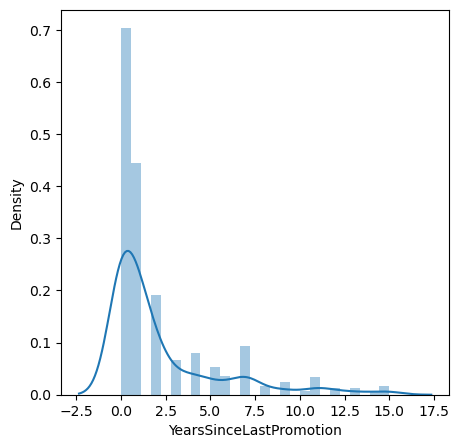

In [288]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=5,5
#dist plot
sb.distplot(number_data['YearsSinceLastPromotion'])
plt.show()

# Square Root Transformation

In [289]:
# applying square root to the skewed column
number_data['YearsSinceLastPromotion'] = np.sqrt(number_data['YearsSinceLastPromotion'])

In [290]:
number_data['YearsSinceLastPromotion'].skew()


0.7350121906940618

In [291]:
# checking for skewed columns
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(skewedness(number_data))

[]


# Ordinal features

In [292]:
# Defing ordinal features
ord_data = df[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
'EmpRelationshipSatisfaction','EmpWorkLifeBalance']]

# Categorical features

In [293]:
# storing object type data in obj_data variable
obj_data = df.select_dtypes(include="object")
obj_data

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
EmpNumber,,,,,,,,
E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No


# Checking for Nan/ Null values

In [294]:
# check for numerical data
number_data.isna().sum()

Age                             0
DistanceFromHome                0
EmpHourlyRate                   0
NumCompaniesWorked              0
EmpLastSalaryHikePercent        0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
dtype: int64

In [295]:
# Check for ordianal data
ord_data.isna().sum()

EmpEducationLevel              0
EmpEnvironmentSatisfaction     0
EmpJobInvolvement              0
EmpJobLevel                    0
EmpJobSatisfaction             0
EmpRelationshipSatisfaction    0
EmpWorkLifeBalance             0
dtype: int64

In [296]:
# Check for categorical data
obj_data.isna().sum()

Gender                     0
EducationBackground        0
MaritalStatus              0
EmpDepartment              0
EmpJobRole                 0
BusinessTravelFrequency    0
OverTime                   0
Attrition                  0
dtype: int64

In [297]:
# combining numerical, ordinal & categorial features
final_df = pd.concat([number_data,ord_data,obj_data,df['PerformanceRating']], axis=1)
final_df

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,...,2,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
E1001006,47,14,42,2,12,20,2,7,7,1.000000,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
E1001007,40,5,48,5,21,20,2,18,13,1.000000,...,3,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No,4
E1001009,41,10,73,3,15,23,2,21,6,3.464102,...,2,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No,3
E1001010,60,16,84,8,14,10,1,2,2,1.414214,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,...,3,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No,4
E100993,37,10,80,3,17,4,2,1,0,0.000000,...,3,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No,3
E100994,50,28,74,1,11,20,3,20,8,1.732051,...,3,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No,3


# Checking Outliers


                                                Checking Outlier in Numerical data                                                



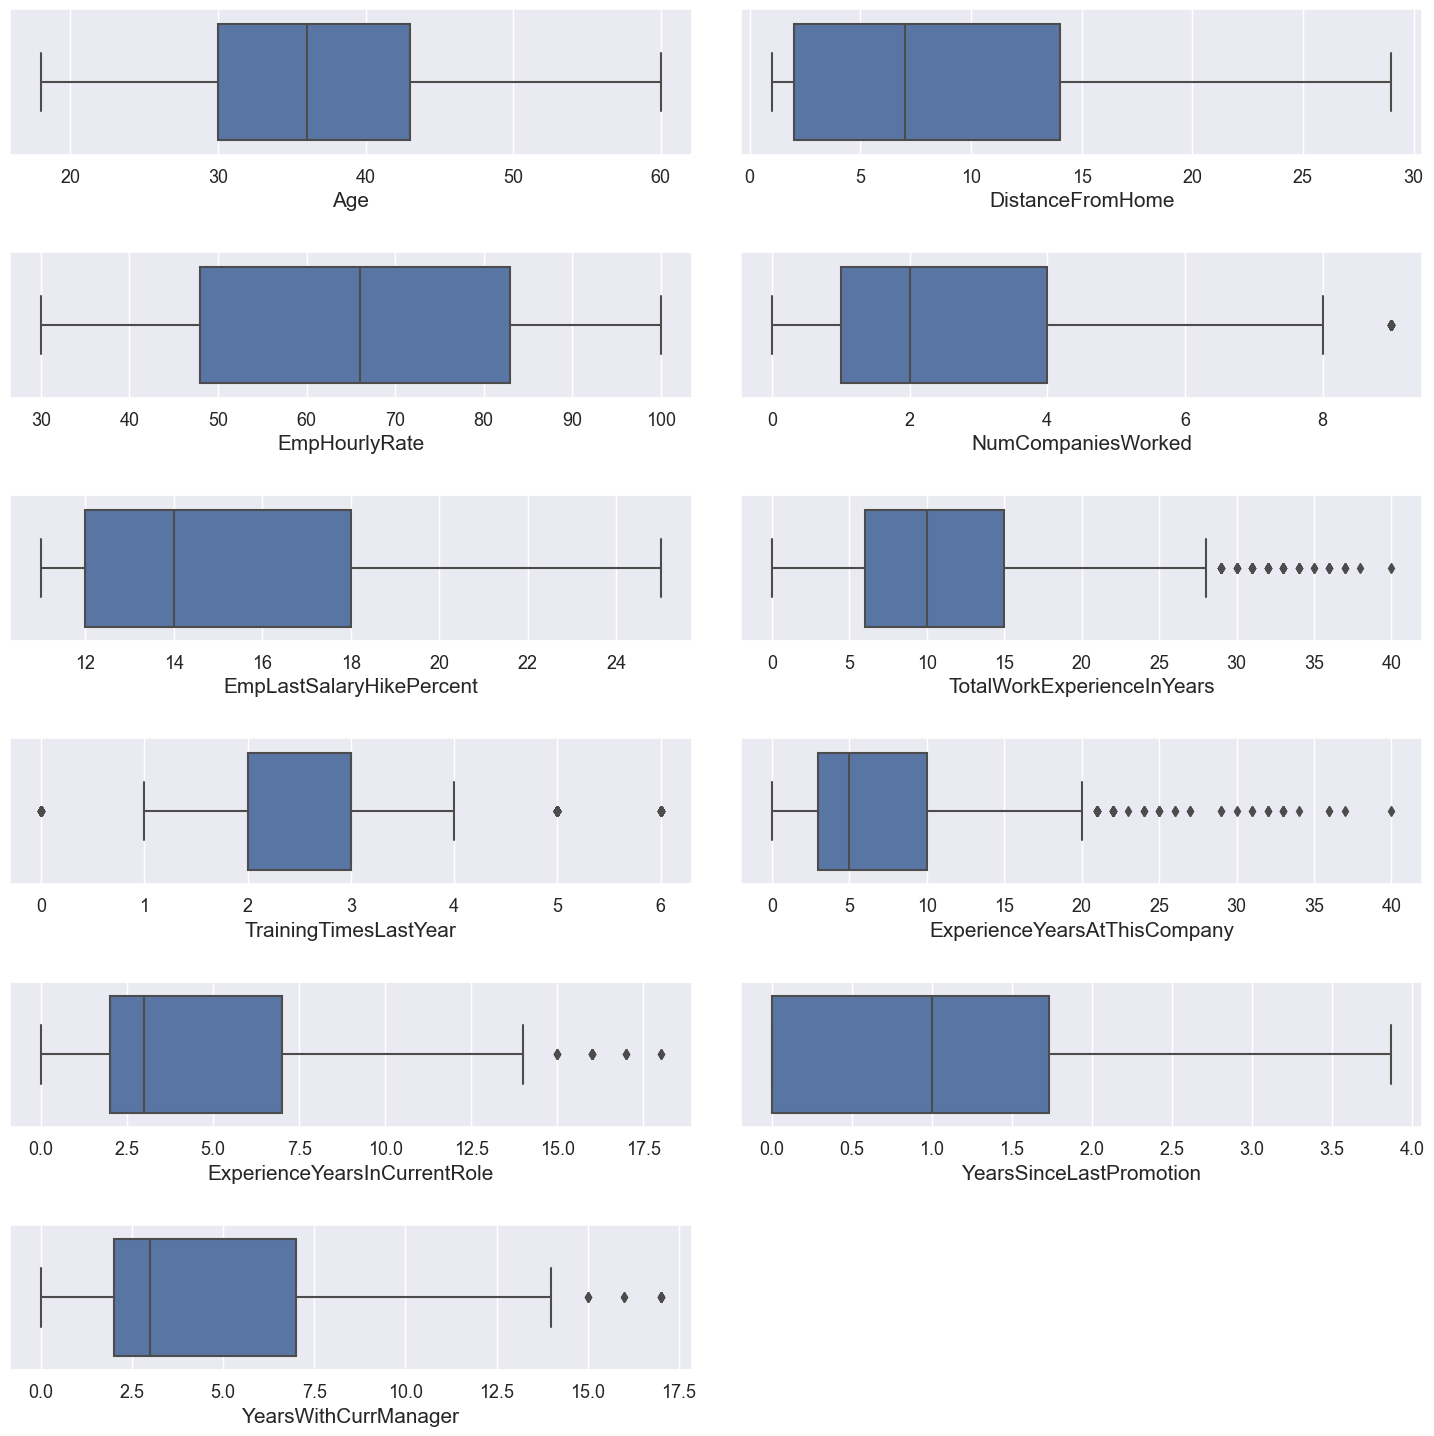

In [298]:
sb.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(15,15))

txt = "Checking Outlier in Numerical data"
x = txt.center(130)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(number_data):
    plt.subplot(6,2,index+1)
    sb.boxplot(number_data.loc[:,cols])
plt.tight_layout(pad=2)

These columns are having outliers:

*NumCompaniesWorked

*TotalWorkExperienceInYears

*TrainingTimesLastYear

*ExperienceYearsAtThisCompany

*ExperienceYearsInCurrentRole

*YearsWithCurrManager

# Treatment on Outliers

##### Num Companies Worked outlier

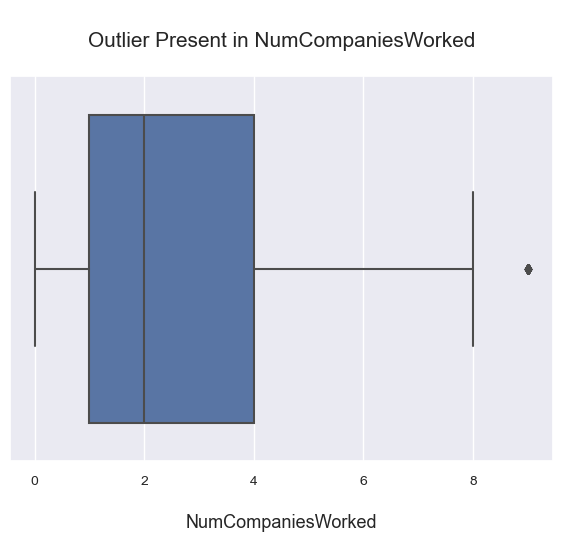

In [299]:
plt.figure(figsize=(7,5))
sb.set_style("darkgrid")
sb.boxplot(final_df["NumCompaniesWorked"])
plt.title("\nOutlier Present in NumCompaniesWorked\n",fontsize=15)
plt.xlabel("\nNumCompaniesWorked",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Outlier value present in NumCompaniesWorked using Z-score method

In [300]:
mean = np.mean(final_df["NumCompaniesWorked"]) 
std = np.std(final_df["NumCompaniesWorked"]) 
threshold = 3.5
outlier = [] 
for i in final_df["NumCompaniesWorked"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('\033[1mOutlier in NumCompaniesWorked  are ', outlier)


Outlier in NumCompaniesWorked  are  []


TotalWorkExperienceInYears outlier


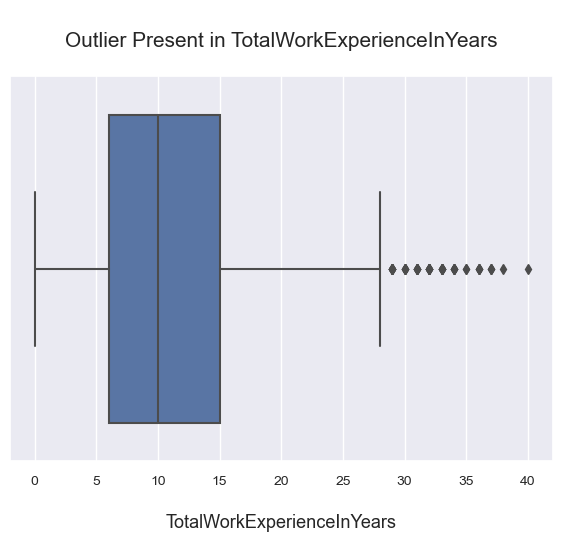

In [301]:
plt.figure(figsize=(7,5))
sb.set_style("darkgrid")
sb.boxplot(final_df["TotalWorkExperienceInYears"])
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n",fontsize=15)
plt.xlabel("\nTotalWorkExperienceInYears",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Outlier value present in TotalWorkExperienceInYears using Z-score method

In [302]:
mean = np.mean(final_df["TotalWorkExperienceInYears"]) 
std = np.std(final_df["TotalWorkExperienceInYears"]) 
threshold = 3.5
outlier = [] 
for i in final_df["TotalWorkExperienceInYears"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [40]


###### Replace the outlier with proper value

In [303]:
final_df["TotalWorkExperienceInYears"] = final_df["TotalWorkExperienceInYears"].replace([40],36)

###### After replacing the outlier with proper value in TotalWorkExperienceInYears

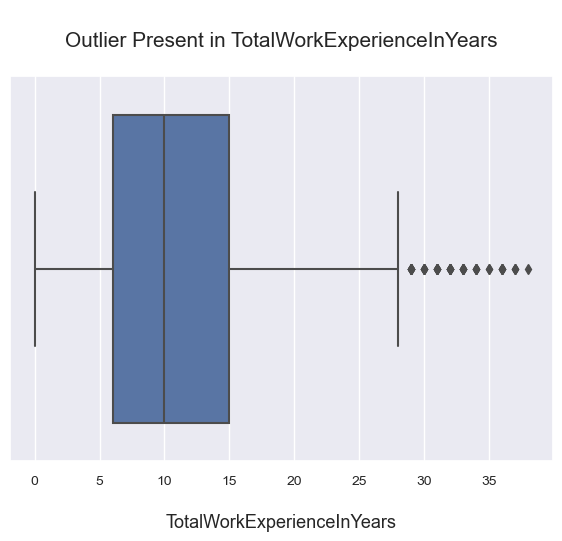

In [304]:
plt.figure(figsize=(7,5))
sb.set_style("darkgrid")
sb.boxplot(final_df["TotalWorkExperienceInYears"])
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n",fontsize=15)
plt.xlabel("\nTotalWorkExperienceInYears",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

TrainingTimesLastYear outlier

Outlier value present in TrainingTimesLastYear using Z-score method


In [305]:
mean = np.mean(final_df["TrainingTimesLastYear"]) 
std = np.std(final_df["TrainingTimesLastYear"]) 
threshold = 3.5
outlier = [] 
for i in final_df["TrainingTimesLastYear"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is []


ExperienceYearsAtThisCompany outlier


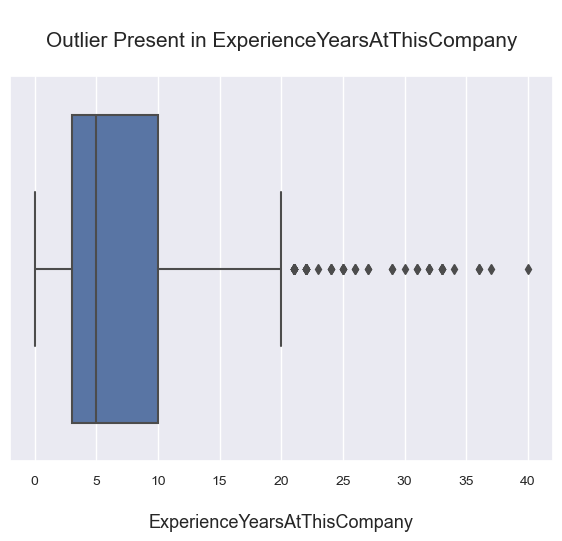

In [306]:
plt.figure(figsize=(7,5))
sb.set_style("darkgrid")
sb.boxplot(final_df["ExperienceYearsAtThisCompany"])
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n",fontsize=15)
plt.xlabel("\nExperienceYearsAtThisCompany",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


Outlier value present in ExperienceYearsAtThisCompany using Z-score method


In [307]:
mean = np.mean(final_df["ExperienceYearsAtThisCompany"]) 
std = np.std(final_df["ExperienceYearsAtThisCompany"]) 
threshold = 3.5
outlier = [] 
for i in final_df["ExperienceYearsAtThisCompany"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [34, 31, 32, 33, 29, 33, 32, 33, 36, 30, 37, 40, 33, 33, 36, 29, 31, 32]


Replace the outlier with proper value


In [308]:
final_df["ExperienceYearsAtThisCompany"] = final_df["ExperienceYearsAtThisCompany"].replace([34, 31, 32, 33, 29, 33, 32, 33, 36, 30, 37, 40, 33, 33, 36, 29, 31, 32],27)

After replacing the outlier with proper value in ExperienceYearsAtThisCompany


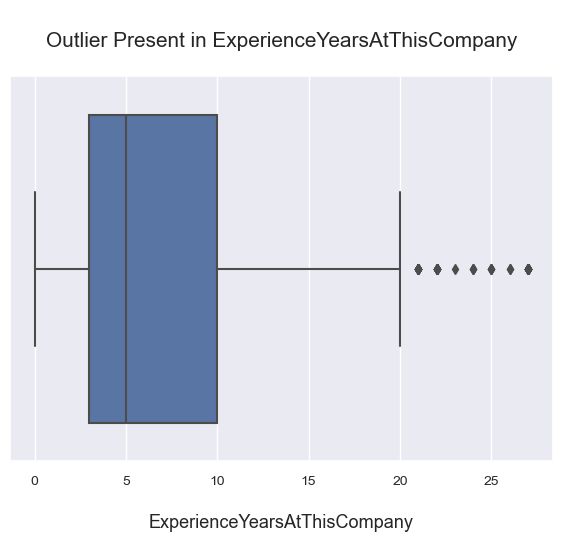

In [309]:
plt.figure(figsize=(7,5))
sb.set_style("darkgrid")
sb.boxplot(final_df["ExperienceYearsAtThisCompany"])
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n",fontsize=15)
plt.xlabel("\nExperienceYearsAtThisCompany",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# ExperienceYearsInCurrentRole outlier


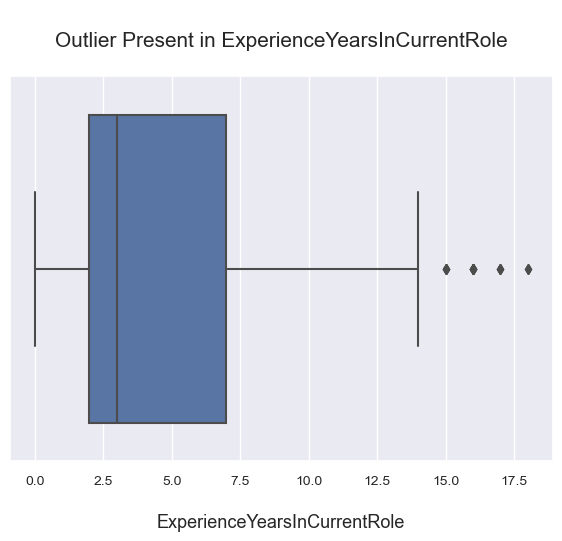

In [310]:
plt.figure(figsize=(7,5))
sb.set_style("darkgrid")
sb.boxplot(final_df["ExperienceYearsInCurrentRole"])
plt.title("\nOutlier Present in ExperienceYearsInCurrentRole\n",fontsize=15)
plt.xlabel("\nExperienceYearsInCurrentRole",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Outlier value present in ExperienceYearsInCurrentRole using Z-score method


In [311]:
mean = np.mean(final_df["ExperienceYearsInCurrentRole"]) 
std = np.std(final_df["ExperienceYearsInCurrentRole"]) 
threshold = 3.5
outlier = [] 
for i in final_df["ExperienceYearsInCurrentRole"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [17, 17, 18, 18, 17]


# Replace the outlier with proper values

In [312]:
final_df["YearsWithCurrManager"] = final_df["YearsWithCurrManager"].replace([17, 17, 17, 17, 17, 17],15)

After replacing the outlier with proper ExperienceYearsInCurrentRole

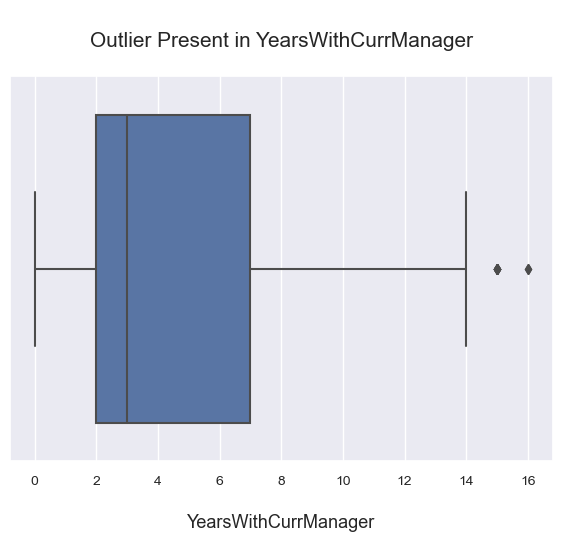

In [313]:
plt.figure(figsize=(7,5))
sb.set_style("darkgrid")
sb.boxplot(final_df["YearsWithCurrManager"])
plt.title("\nOutlier Present in YearsWithCurrManager\n",fontsize=15)
plt.xlabel("\nYearsWithCurrManager",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [314]:
obj_data.columns

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

Label Encoding

As object type data is not understand for the Ml Algorithm, so we have to encode object type data

In [315]:
# Converting Labeled data to Numerical data using label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df[['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']] = final_df[['Gender', 'EducationBackground', 
        'MaritalStatus', 'EmpDepartment','EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']].apply(label.fit_transform)

After Encoding dataset:

In [316]:
final_df

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,...,2,1,2,2,5,13,2,0,0,3
E1001006,47,14,42,2,12,20,2,7,7,1.000000,...,3,1,2,2,5,13,2,0,0,3
E1001007,40,5,48,5,21,20,2,18,13,1.000000,...,3,1,1,1,5,13,1,1,0,4
E1001009,41,10,73,3,15,23,2,21,6,3.464102,...,2,1,0,0,3,8,2,0,0,3
E1001010,60,16,84,8,14,10,1,2,2,1.414214,...,3,1,2,2,5,13,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,...,3,0,3,0,5,13,1,1,0,4
E100993,37,10,80,3,17,4,2,1,0,0.000000,...,3,1,1,2,1,15,2,0,0,3
E100994,50,28,74,1,11,20,3,20,8,1.732051,...,3,1,3,1,1,15,2,1,0,3


In [317]:
# defing Independent variables as X
X = final_df.iloc[:,:-1]
# Defing Target variable or dependent variable
y = final_df.iloc[:,-1]
X

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,...,4,2,1,2,2,5,13,2,0,0
E1001006,47,14,42,2,12,20,2,7,7,1.000000,...,4,3,1,2,2,5,13,2,0,0
E1001007,40,5,48,5,21,20,2,18,13,1.000000,...,3,3,1,1,1,5,13,1,1,0
E1001009,41,10,73,3,15,23,2,21,6,3.464102,...,2,2,1,0,0,3,8,2,0,0
E1001010,60,16,84,8,14,10,1,2,2,1.414214,...,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,...,2,3,0,3,0,5,13,1,1,0
E100993,37,10,80,3,17,4,2,1,0,0.000000,...,1,3,1,1,2,1,15,2,0,0
E100994,50,28,74,1,11,20,3,20,8,1.732051,...,3,3,1,3,1,1,15,2,1,0


Checking for Imbalance data

In [318]:
y.value_counts(normalize=True)*100

3    72.833333
2    16.166667
4    11.000000
Name: PerformanceRating, dtype: float64

Our ML Algorithm learn more about level 3 performance rating compare to level 2 & level 4. It will lead biasing problem. So we have to balance the data

# Handling Imbalanced data

Converting Imbalance data into balanced data

*Balancing data with SMOTE Technique gives more number of NaN values

*so, we use RandomOverSampler Technique to balance the data

In [319]:
# install imblearn for running Randomoversampler technique
#pip install imblearn # uncomment this line for installing imblearn package

In [320]:
# Imports
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
# Intilizing the model
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_sample(X,y)
X_smote = pd.DataFrame(X_smote)
X_smote.columns = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition']
X_smote

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,...,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,32,10,55,1,12,10,2,10,7,0.000000,...,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.000000,...,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,3,1,1,1,5,13,1,1,0
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,2,1,0,0,3,8,2,0,0
4,60,16,84,8,14,10,1,2,2,1.414214,...,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,34,28,95,1,21,8,2,8,7,1.000000,...,4,3,0,2,1,5,13,2,0,0
2618,42,2,79,7,16,10,3,4,3,0.000000,...,1,4,1,3,1,3,6,0,0,0
2619,31,7,48,3,22,10,3,7,7,1.000000,...,4,2,1,1,0,1,3,2,0,0
2620,30,1,58,1,23,12,2,12,8,1.732051,...,4,3,0,3,2,1,3,1,0,0


In [321]:
y_smote.value_counts(normalize=True)*100

3    33.333333
4    33.333333
2    33.333333
Name: PerformanceRating, dtype: float64

Now, we can say our data is balanced

In [322]:
# Again checking for Normal distribution in balanced data
from scipy.stats import skew
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

skewedness(X_smote)

['Attrition']

Feature Selection

In [323]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_smote,y_smote)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

print(featurescores.nlargest(5,'Scores'))

                   feature_names       Scores
4       EmpLastSalaryHikePercent  1274.799511
7   ExperienceYearsAtThisCompany   496.635416
12    EmpEnvironmentSatisfaction   466.380440
8   ExperienceYearsInCurrentRole   424.346328
9        YearsSinceLastPromotion   332.774411


These are the Top 5 features which impact on the target variable to predict the rating

In [324]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2622 non-null   int64  
 1   DistanceFromHome              2622 non-null   int64  
 2   EmpHourlyRate                 2622 non-null   int64  
 3   NumCompaniesWorked            2622 non-null   int64  
 4   EmpLastSalaryHikePercent      2622 non-null   int64  
 5   TotalWorkExperienceInYears    2622 non-null   int64  
 6   TrainingTimesLastYear         2622 non-null   int64  
 7   ExperienceYearsAtThisCompany  2622 non-null   int64  
 8   ExperienceYearsInCurrentRole  2622 non-null   int64  
 9   YearsSinceLastPromotion       2622 non-null   float64
 10  YearsWithCurrManager          2622 non-null   int64  
 11  EmpEducationLevel             2622 non-null   int64  
 12  EmpEnvironmentSatisfaction    2622 non-null   int64  
 13  Emp

In [325]:
X_smote.columns


Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

Without Feature selection Technique

# Model training with all features
By passing all features columns in x and performancerating (target column) as y
For Test data, Model is getting Accuracy score: 98%
For Train data,Model is getting Accuracy score: 100%
while passing all feature model is getting 98% accuracy, Model might be overfitting.
So, we will pass selected features by applying feature selection technique

Feature selection Technique
Model training with selected features
By passing top 3 features columns in x and performancerating (target column) as y
For Test data, Model is getting Accuracy score: 90%
For Train data, Model is getting Accuracy score: 93%
Model fitting
By passing top 5 features columns in x and performancerating (target column) as y
For Test data, Model is getting Accuracy score: 94%
For Train data, Model is getting Accuracy score: 97%

# Defining Features & Target for ML algorithm

In [326]:
X = X_smote.loc[:,['EmpLastSalaryHikePercent','ExperienceYearsAtThisCompany','EmpEnvironmentSatisfaction','EmpEnvironmentSatisfaction','YearsSinceLastPromotion']] # features
y = y_smote # target

Spliting the dataset for training and test purpose

ML Algorithm

Evalutation of Machine Learning Model

# checking Train accuracy to avoid overfitting problem

Extra trees

Feature Scaling

In [327]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y,random_state=42,test_size=0.20)

In [328]:
from sklearn.model_selection import RandomizedSearchCV
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

[17:46:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [329]:
print(model.best_estimator_)
model.best_params_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=0.001, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


{'reg_lambda': 0.001,
 'n_estimators': 500,
 'max_depth': 4,
 'learning_rate': 0.1}

In [330]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [331]:

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           2       0.91      0.99      0.95       184
           3       0.98      0.86      0.92       173
           4       0.96      0.98      0.97       168

    accuracy                           0.94       525
   macro avg       0.95      0.94      0.94       525
weighted avg       0.95      0.94      0.94       525



In [332]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           2       0.94      1.00      0.97       690
           3       0.99      0.93      0.96       701
           4       0.98      0.99      0.98       706

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



In [333]:
accuracy_score(y_test,y_test_pred)

0.9447619047619048

In [334]:
accuracy_score(y_train,y_train_pred)

0.9699570815450643

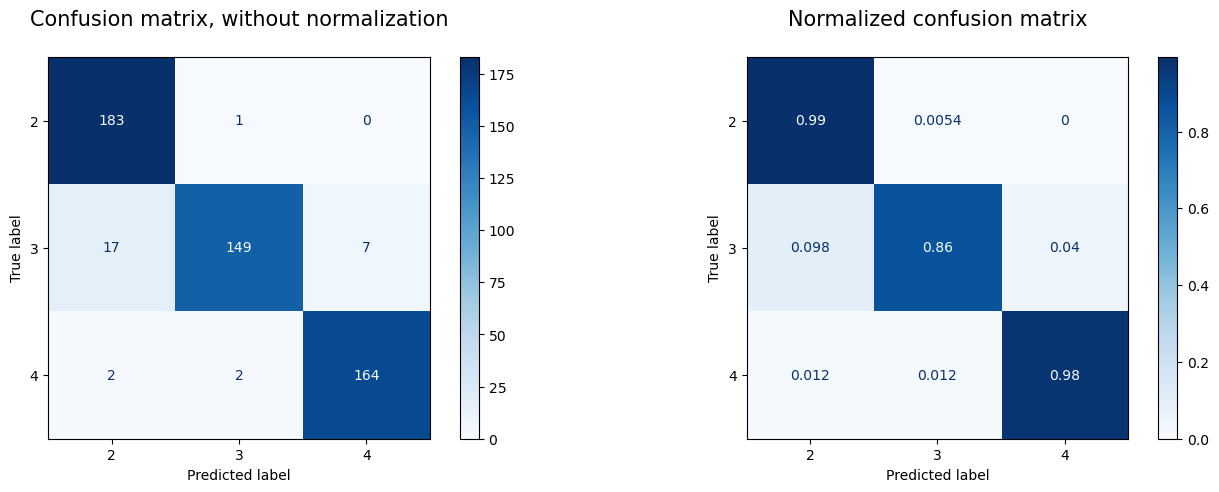

In [335]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib
# Default theame for plotings
matplotlib.rcdefaults()
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# Plot non-normalized confusion matrix
cm1 = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=6)

plt.show()

### Random forest classifier

In [347]:
# imports
from sklearn.ensemble import RandomForestClassifier
# Intilize model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predict  = rf.predict(X_test)
predicted  = rf.predict(X_train)

In [348]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,predict))

Accuracy score : 95.04 %

Classification Report

              precision    recall  f1-score   support

           2       0.93      0.99      0.96       278
           3       0.98      0.88      0.93       250
           4       0.95      0.98      0.97       259

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [349]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_train,predicted)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_train,predicted))

Accuracy score : 97.55 %

Classification Report

              precision    recall  f1-score   support

           2       0.96      0.99      0.98       596
           3       0.99      0.94      0.97       624
           4       0.97      1.00      0.98       615

    accuracy                           0.98      1835
   macro avg       0.98      0.98      0.98      1835
weighted avg       0.98      0.98      0.98      1835



Feature Scaling

In [338]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X2=scaler.fit_transform(X)

In [339]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y,random_state=42,test_size=0.30)

In [340]:
from xgboost import XGBClassifier

xb =  XGBClassifier()
xb.fit(X_train,y_train)
y_predict = xb.predict(X_test)
y_predicts = xb.predict(X_train)
y_train.value_counts()

[17:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


3    624
4    615
2    596
Name: PerformanceRating, dtype: int64

In [341]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))

Accuracy score : 94.41 %

Classification Report

              precision    recall  f1-score   support

           2       0.93      0.98      0.95       278
           3       0.94      0.88      0.91       250
           4       0.97      0.97      0.97       259

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



In [343]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_train,y_predicts)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_train,y_predicts))

Accuracy score : 97.33 %

Classification Report

              precision    recall  f1-score   support

           2       0.95      0.99      0.97       596
           3       0.99      0.94      0.96       624
           4       0.98      0.99      0.98       615

    accuracy                           0.97      1835
   macro avg       0.97      0.97      0.97      1835
weighted avg       0.97      0.97      0.97      1835



# Conclusion:

     In XGBoosst classifier model with best fit parameter tuning train accuracy shows 94% and test accuracy shows 97% which shows almost same after feature scaling of XGBoost model
     In Random forest classifier it shows train accuracy shows 95% and test accuracy shows 97% which shows almost same as XGBoost model
     Comparing both XGB classifier and Random forest classifier shows better on given data